In [1]:
from transient_solid_earth import load_parameters, generate_load_model_variations

parameters = load_parameters()
load_model_variations = generate_load_model_variations(
    load_model_parameters=parameters.load.model,
    load_model_variabilities=parameters.load_model_variabilities,
)

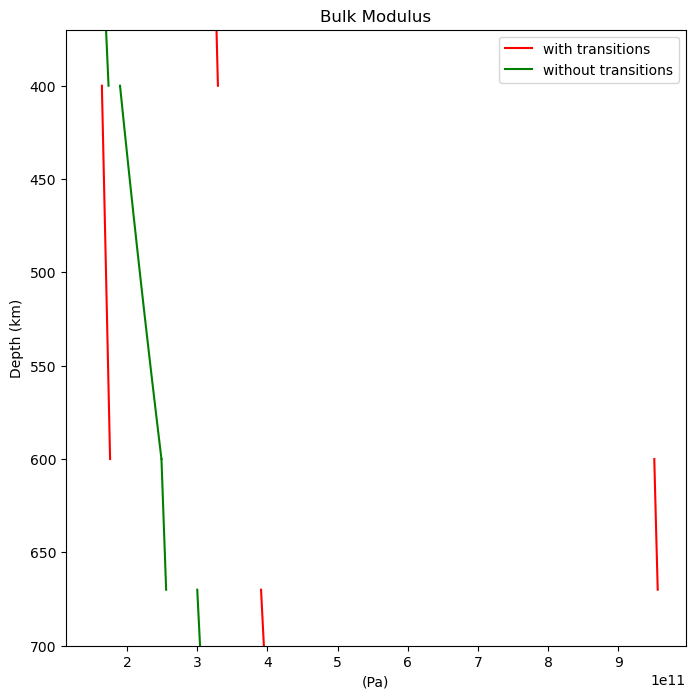

array([[-0.89771973+0.j, -0.0049953 +0.j, -0.29422401+0.j],
       [ 0.09207059+0.j,  0.30675511+0.j,  0.08707531+0.j],
       [ 0.57132345+0.j,  0.08707536+0.j,  0.27709962+0.j]])

In [ ]:
from transient_solid_earth import (
    SolidEarthTimeDependentNumericalModel,
    SolidEarthFullNumericalModel,
    load_parameters,
)
from numpy import inf

parameters = load_parameters()

parameters.solid_earth.model.structure_parameters.asymptotic_compressibility = True

SolidEarthTimeDependentNumericalModel(
    solid_earth_full_numerical_model=SolidEarthFullNumericalModel(
        solid_earth_parameters=parameters.solid_earth
    ),
    period=inf,  # (yr).
    n=2,
).integrate_y_i_systems(save=False)

In [14]:
from transient_solid_earth import (
    SolidEarthTimeDependentNumericalModel,
    SolidEarthFullNumericalModel,
    load_parameters,
)
from numpy import inf, logspace, unique, floor

parameters = load_parameters()
love_numbers_with_all_phase_transitions = []
love_numbers = []

n_list = unique(floor(logspace(start=0, stop=4, num=130, base=10)))

for n in n_list:

    parameters.solid_earth.model.structure_parameters.asymptotic_compressibility = True

    love_numbers_with_all_phase_transitions += [
        SolidEarthTimeDependentNumericalModel(
            solid_earth_full_numerical_model=SolidEarthFullNumericalModel(
                solid_earth_parameters=parameters.solid_earth
            ),
            period=inf,  # (yr).
            n=n,
        ).integrate_y_i_systems(save=False)
    ]

    parameters.solid_earth.model.structure_parameters.asymptotic_compressibility = False

    love_numbers += [
        SolidEarthTimeDependentNumericalModel(
            solid_earth_full_numerical_model=SolidEarthFullNumericalModel(
                solid_earth_parameters=parameters.solid_earth
            ),
            period=inf,  # (yr).
            n=n,
        ).integrate_y_i_systems(save=False)
    ]

/home/maxime/miniconda3/envs/venv_2/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/maxime/miniconda3/envs/venv_2/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


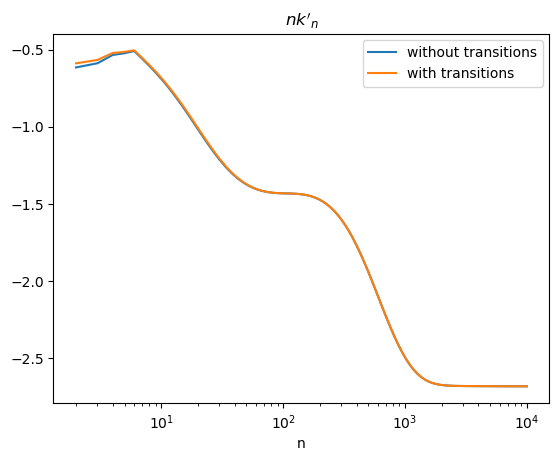

In [20]:
from matplotlib.pyplot import semilogx, show, legend, title, xlabel
from numpy import array

semilogx(n_list[1:], (n_list * array(love_numbers)[:, 0, 2])[1:], label="without transitions")
semilogx(
    n_list[1:],
    (n_list * array(love_numbers_with_all_phase_transitions)[:, 0, 2])[1:],
    label="with transitions",
)
legend()
title("$nk'_n$")
xlabel("n")
show()

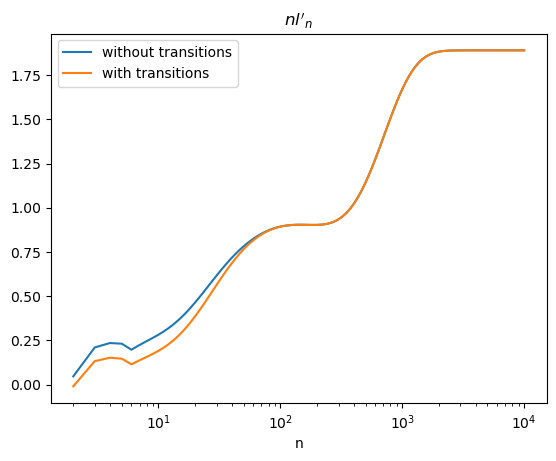

In [17]:
semilogx(n_list[1:], (n_list * array(love_numbers)[:, 0, 1])[1:], label="without transitions")
semilogx(
    n_list[1:],
    (n_list * array(love_numbers_with_all_phase_transitions)[:, 0, 1])[1:],
    label="with transitions",
)
legend()
title("$nl'_n$")
xlabel("n")
show()

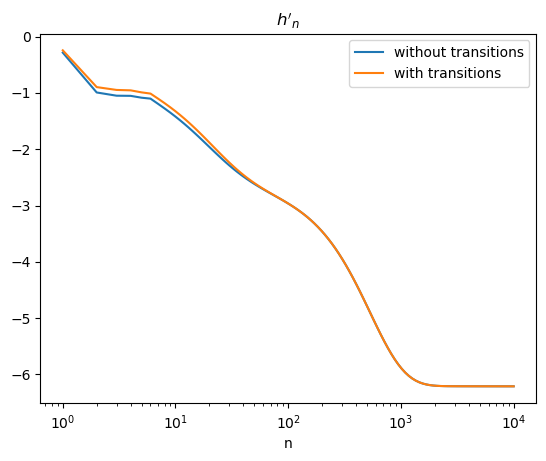

In [16]:
semilogx(n_list, array(love_numbers)[:, 0, 0], label="without transitions")
semilogx(n_list, array(love_numbers_with_all_phase_transitions)[:, 0, 0], label="with transitions")
legend()
title("$h'_n$")
xlabel("n")
show()

In [ ]:
# Represents [[h', l', k'], [h*, l*, k*], [h, l, k]].